# Data Visualization

This notebook covers different ways to visualize data depending on what you are trying to accomplish. 

In [23]:
# Package imports
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Ignore warnings while creating visuals
import warnings
warnings.filterwarnings("ignore")

##### Data Distributions

The first method we will examine is viewing how data is distributed. 

In [24]:
# For these examples, we will use the Weather Dataset 
df = pd.read_csv("/Users/umreenimam/Documents/BMCC/Lesson Materials/Weeks 3 - 4/Week 4/Lab/Weather Data.csv")
df.head()

,Location,Season,Entry,Temp
0,City A,Spring,1,35.0
1,City B,Spring,1,35.0
2,City C,Spring,1,69.0
3,City A,Summer,1,78.0
4,City B,Summer,1,74.0


<hr>

Data Distrubution - Histogram

The first way to view to a distribution is by using a histogram. We will create a histogram using the Temperatures column.

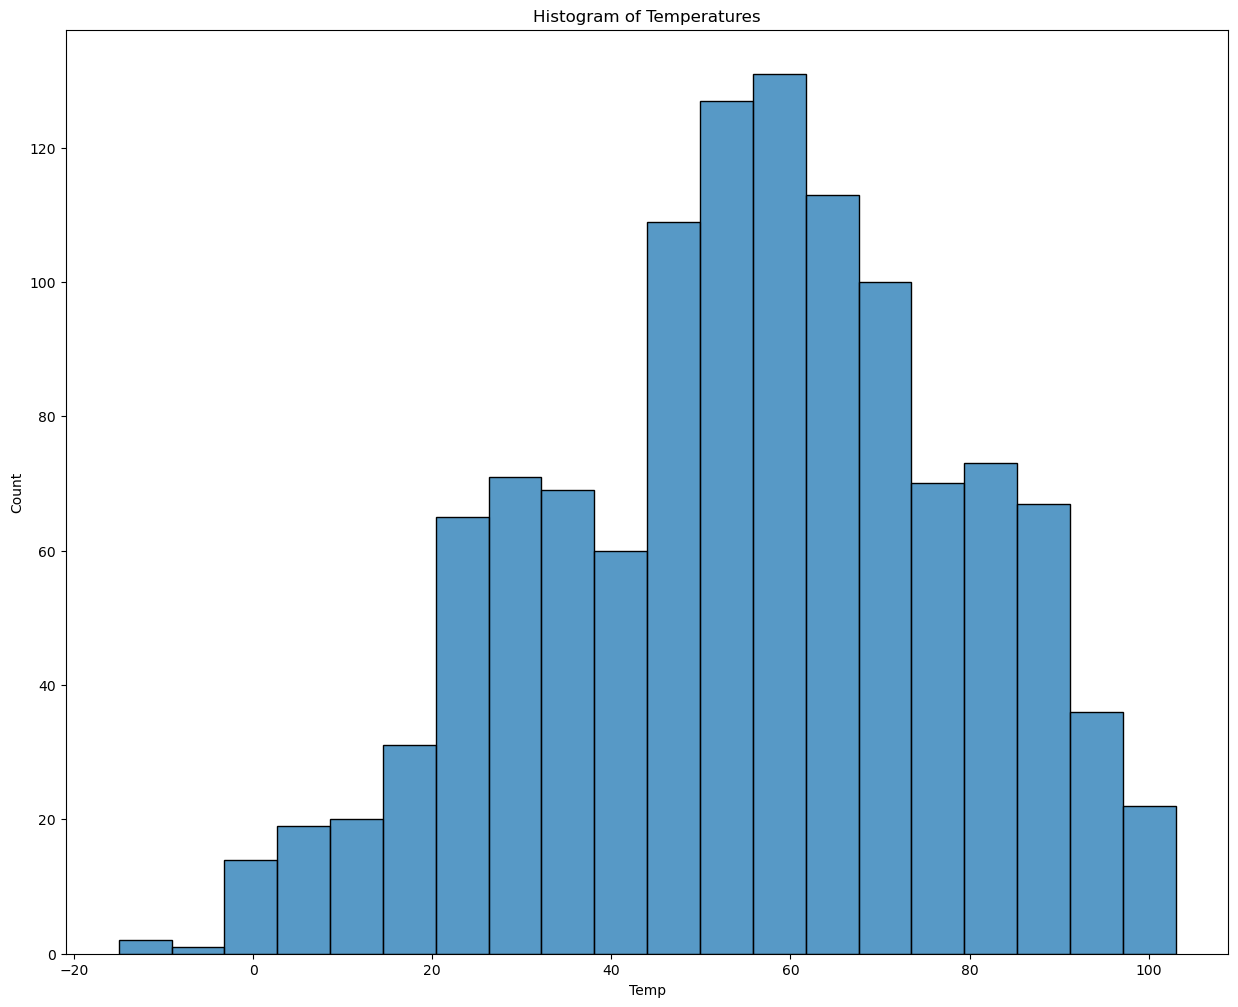

In [25]:
# Make the seasons column a category 
df["Season"] = df["Season"].astype("category")

# Begin creation of histogram
plt.figure(figsize = (15, 12))
sns.histplot(df, x = "Temp")
plt.title("Histogram of Temperatures")
plt.show()


##### Formatting the histogram to display more information

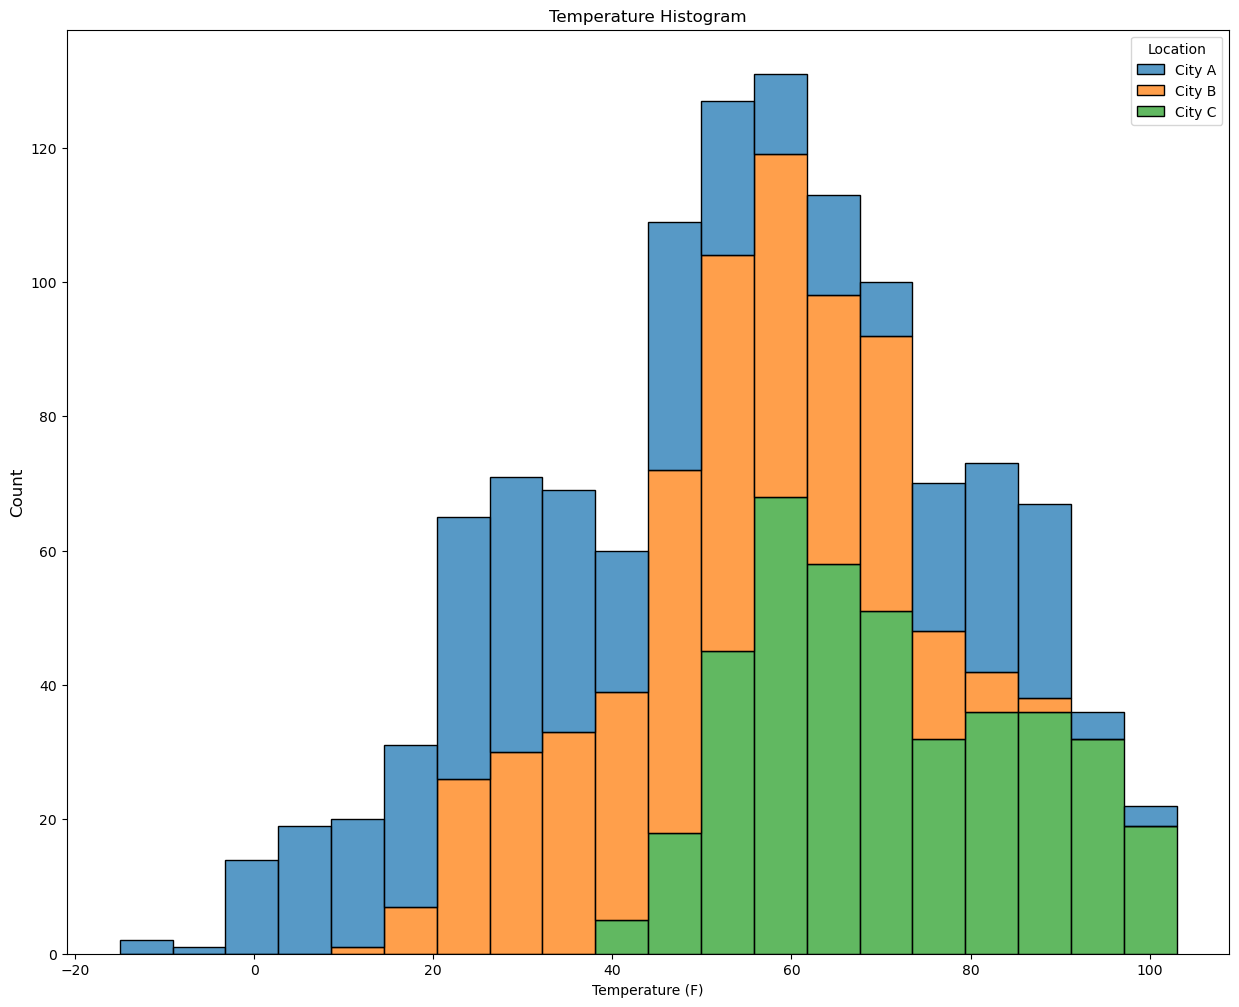

In [26]:
# Create the figure 
plt.figure(figsize = (15, 12))

# Generate histogram
sns.histplot(df, x = "Temp", hue = "Location", multiple = "stack")
plt.title("Temperature Histogram")
plt.xlabel("Temperature (F)")
plt.ylabel("Count", fontsize = 12)

plt.show()

What are some things you notice about this histogram and how temperatures are distributed? 

What if you wanted to view the distribution of temperatures based on a certain variable? Let's take a look at how to do that.

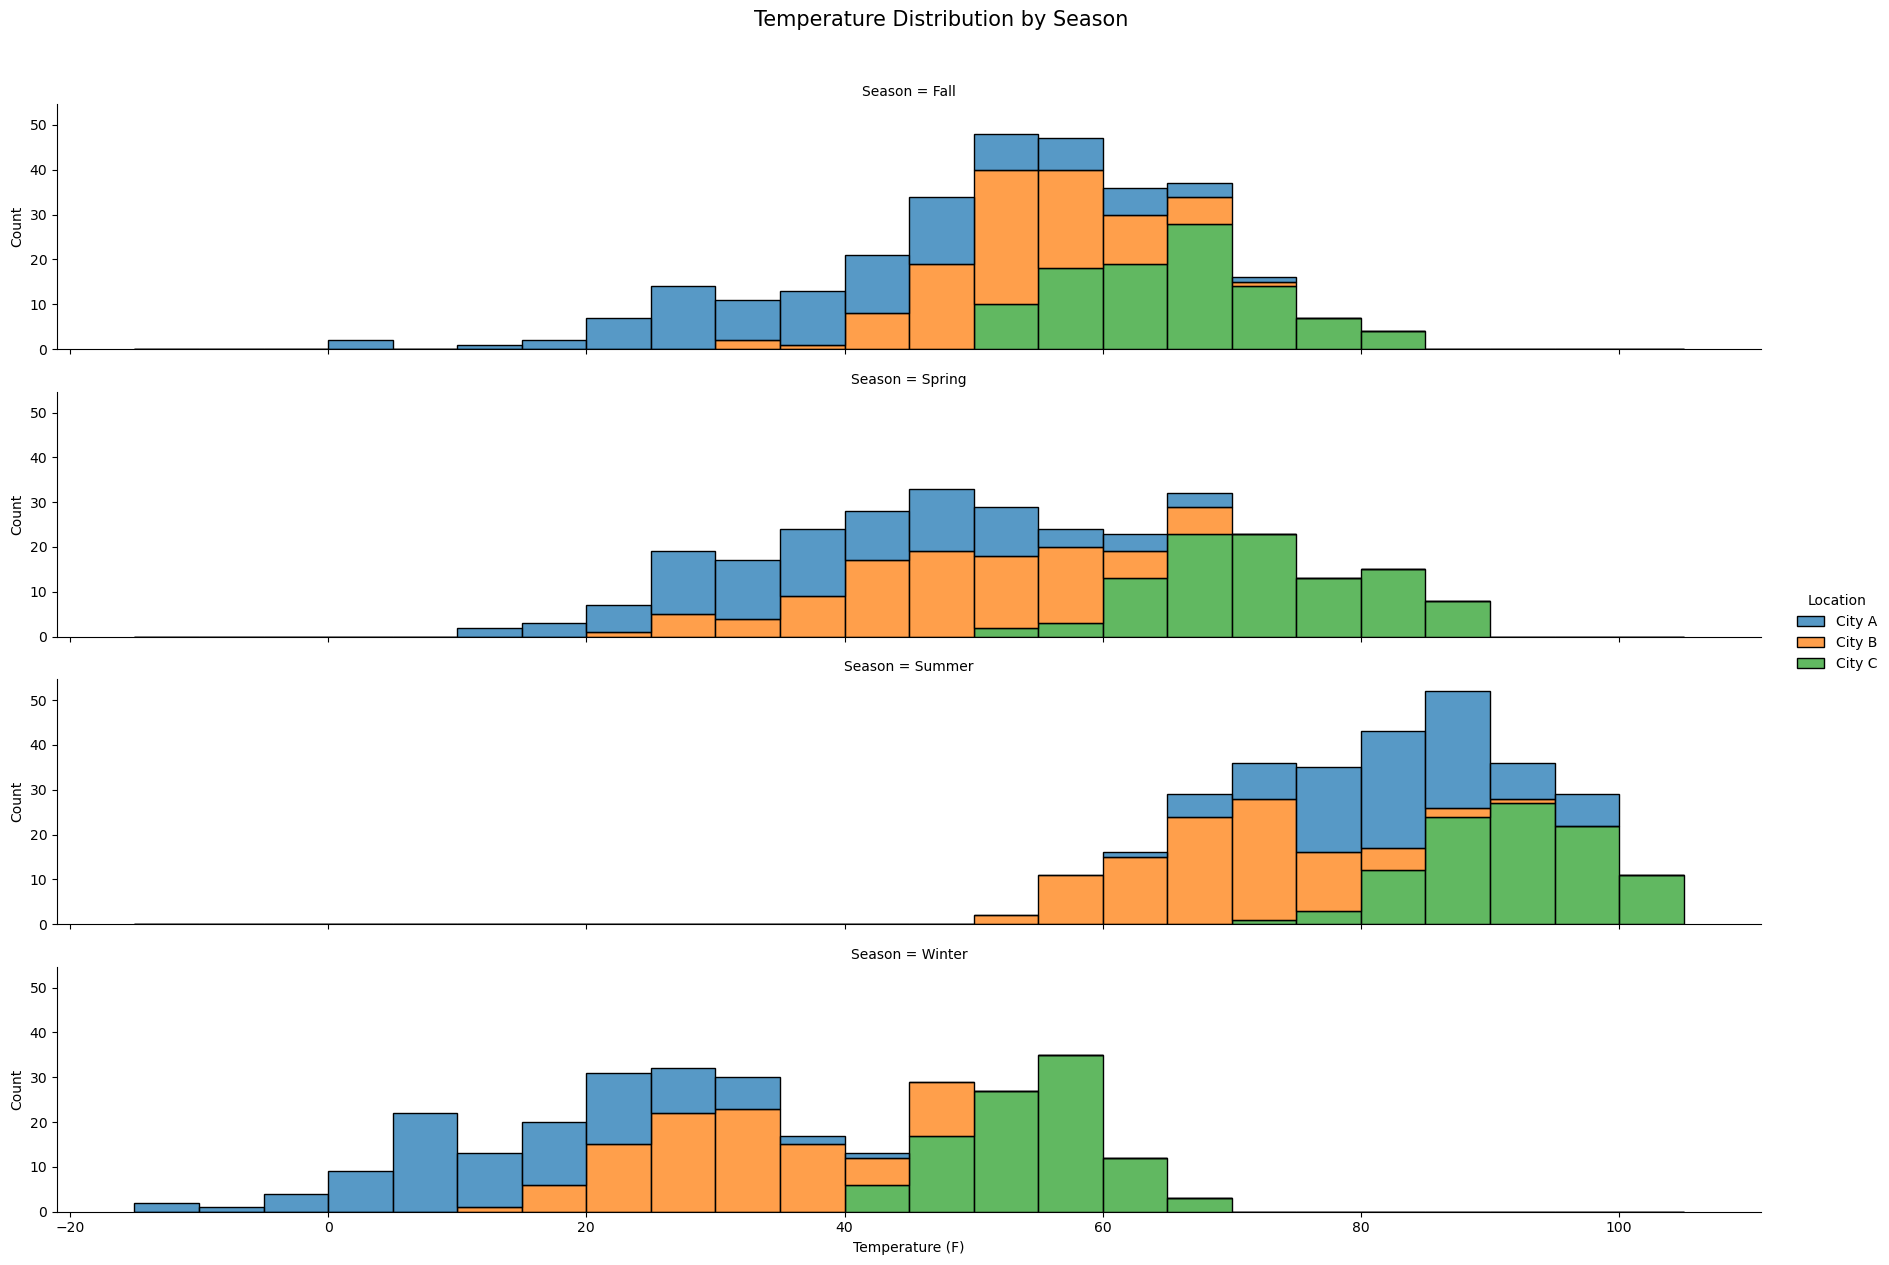

In [27]:
# We will use the creation of a displot which allows for the creation of a histogram
# and the ability to create facet plots 

# Generate displot with attributes 
dist = sns.displot(df, x = "Temp", col = "Season", hue = "Location",
                   multiple = "stack", col_wrap = 1, binwidth = 5, height = 3, aspect = 6,
                   facet_kws = dict(margin_titles = True))

dist.figure.suptitle("Temperature Distribution by Season",
                     fontsize = 15, ha = "center",
                     x = 0.50, y = 1.05)

dist.set_axis_labels("Temperature (F)", "Count")

What do you notice about the distribution of temperatures across seasons and across cities? 

Histograms can be very useful when examining how certain variables are distributed across your data. Another visual that allows for data distribution observation is the Density Curve.

<hr>

Data Distribution - Density Curve aka KDE Plots

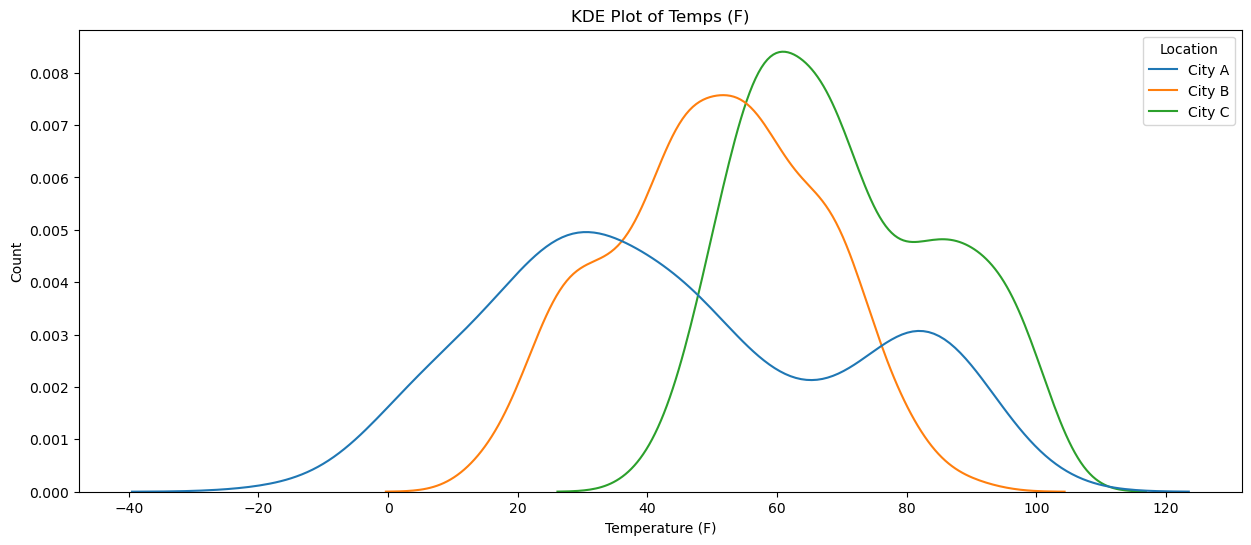

In [28]:
# Create figure and set plot size
plt.figure(figsize = (15, 6))

# Generate plot with attributes
sns.kdeplot(df, x = "Temp", hue = "Location", fill = False)
plt.title("KDE Plot of Temps (F)")
plt.xlabel("Temperature (F)")
plt.ylabel("Count")
plt.show()

The KDE plot appears to be a little smoother than the histogram as it uses a Gaussian kernel which produces a density estimate. 

Let's change some attributes to show multiple variables using a distplot.

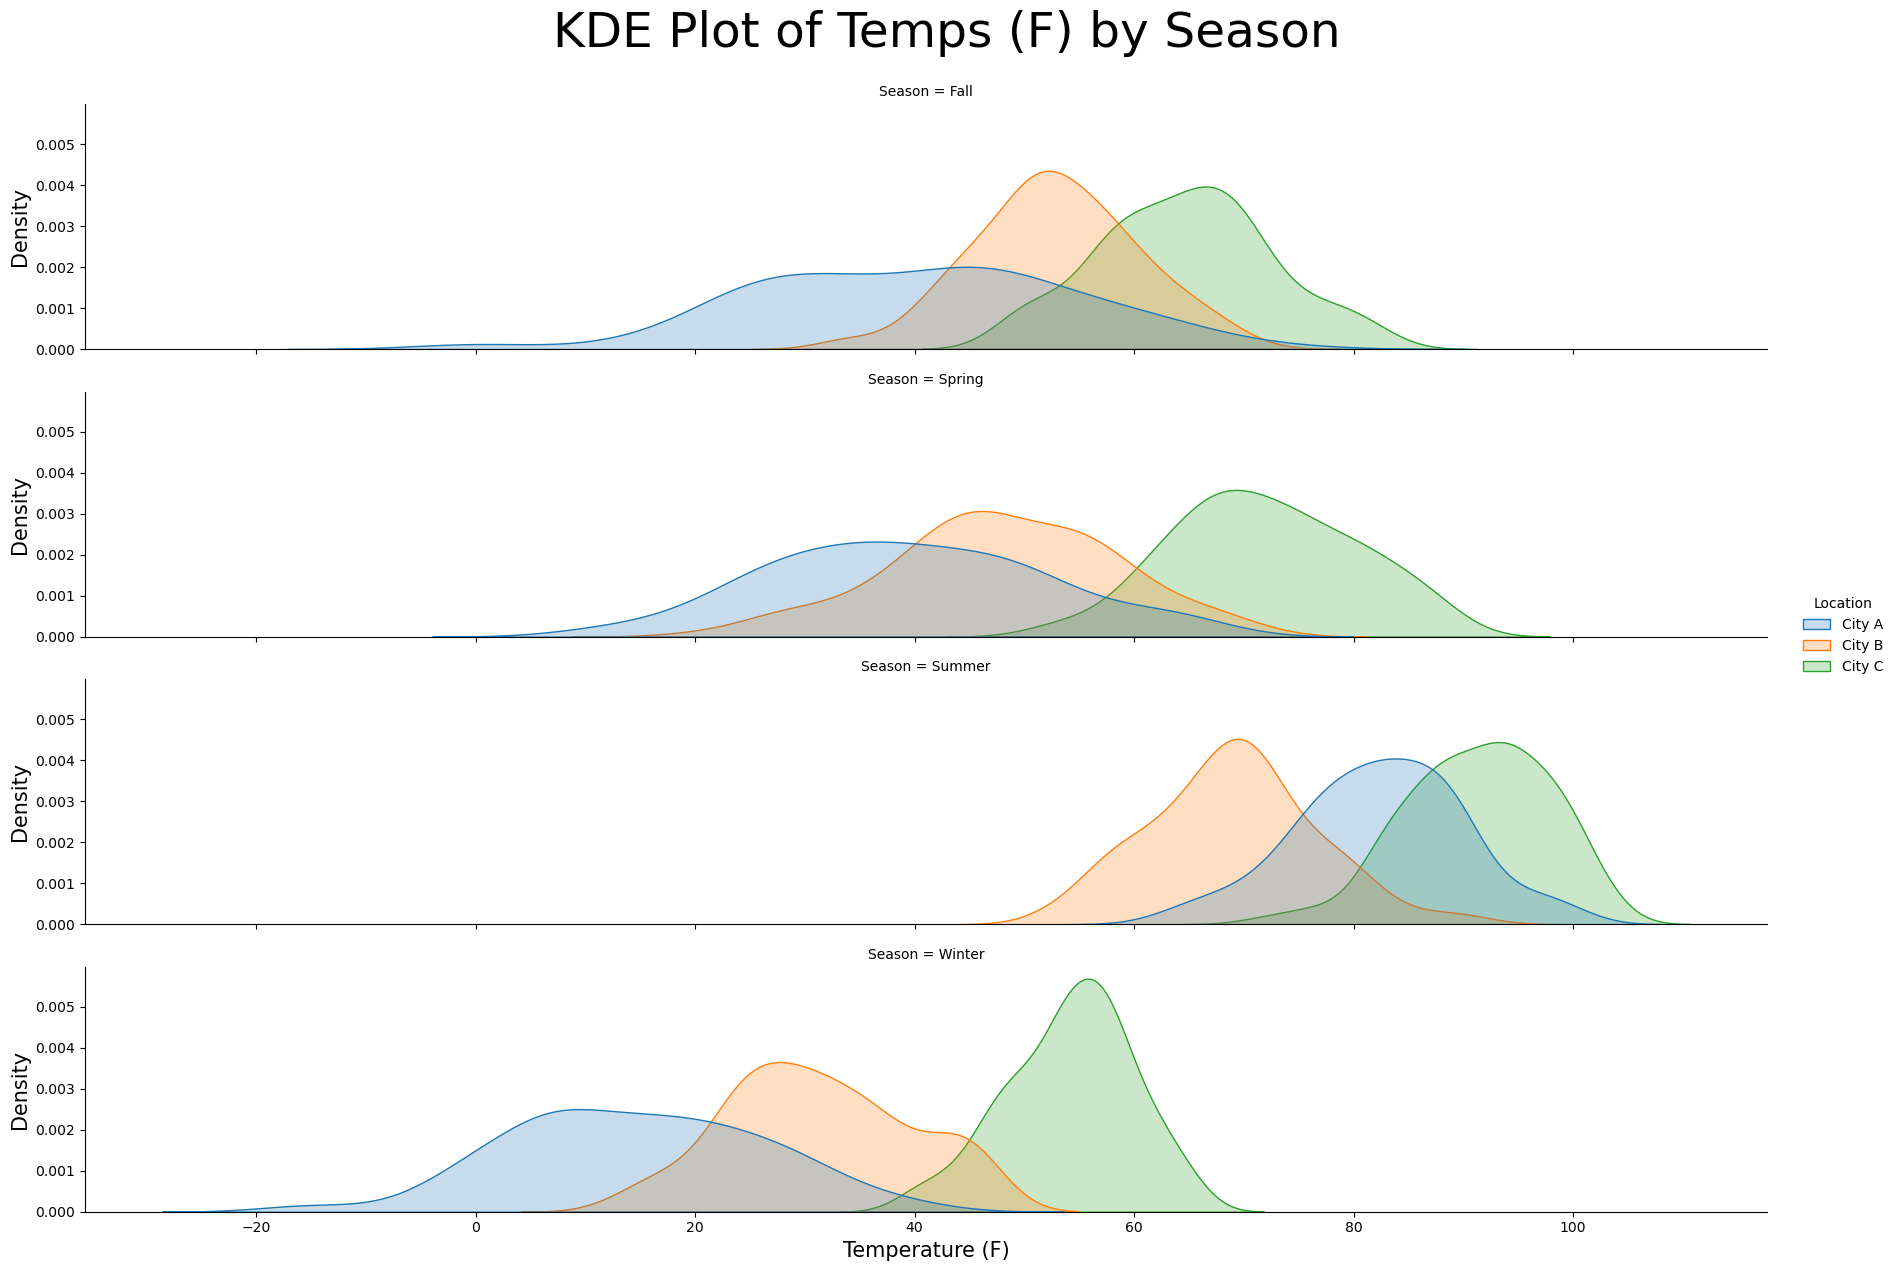

In [29]:
# Generate distplot with attributes
dist_kde = sns.displot(df, x = "Temp", col = "Season", hue = "Location",
                       kind = "kde", height = 3, aspect = 6, col_wrap = 1,
                       fill = True, facet_kws = dict(margin_titles = True))
dist_kde.figure.suptitle("KDE Plot of Temps (F) by Season",
                         ha = "center", y = 1.05, fontsize = 35)

dist_kde.set_axis_labels("Temperature (F)", "Density", fontsize = 15)

Density plots show the probability density function (PDF) of the variable shown. It is essentially the same as a histogram, but smoothed therefore smoothing out noise. 

The last visual to show how data is distributed, is the box plot. 

<hr>

Data Distribution - Box plot

Box plots can convey multiple pieces of information in one visual. These pieces include the following: min, max, outliers, median, quartiles, the IQR, and sometimes skewness in the data. 

The following example shows to how to create boxplots using the interactive Python visualization library, Plotly Express. 

In [30]:
# Import plotly express
import plotly.express as px

In [32]:
# Create figure and set color theme
boxplot = px.box(df, x = "Season", color = "Location", y = "Temp",
                 color_discrete_sequence = px.colors.cyclical.Edge)

# Update titles (main and axes) and format
boxplot.update_layout(title = {"text": "Seaonsal Temperature Distribution",
                               "xanchor": "left", "yanchor": "top", "x": 0.1}, 
                               legend_title_text = "Location", xaxis_title = "Season", yaxis_title = "Temperature (F)")

# Show plot
boxplot.show()

Since we are using plotly, we are able to hover each box and view crucial pieces of information for each season (give it a try). The boxplot also identifies outliers (represented by the dots) when they are present in the data. 

<hr>

Let's now take a look at some visualizations to use when comparing values between groups. Let's start off with the most used, the bar chart. 

Compare Values - Bar Chart

In [43]:
# We will use Plotly to create the visuals 
barchart = px.bar(df, x = "Season", color = "Location", y = "Temp", barmode = "group")
barchart.show()

The bar chart above shows temperatures by season and grouped by city. This allows for easy comparison between each of these categories. 

Check out more ways to customize the bar charts using plotly here: https://plotly.com/python/bar-charts/ 

<hr>

Compare values - Dot plot

Compared to the bar plot, dot plots (or scatter) display similar situation and accomplish the same goal, but in a cleaner way. 

In [52]:
# Generate scatter plot
scatter_plt = px.scatter(df, y = "Season", x = "Temp", color = "Location", symbol = "Location",
                         width = 600, height = 400)
scatter_plt.update_traces(marker_size = 5)
scatter_plt.show()

The scatter plot above does allow us to see a general comparison of temperatures across seasons and cities using diferent markers for each city. Depending on the amount of data you have available, the bar plot may be a better option. 

<hr>

The next category of visualizations we will look at are visuals for viewing change over time. 

<br>

Change over time - Line plot

To view change over time, we will use the disasters datset.

In [54]:
df = pd.read_excel("/Users/umreenimam/Documents/BMCC/Lesson Materials/Weeks 3 - 4/Week 4/Lab/public_emdat_project.xlsx")
df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage,"Total Damage, Adjusted",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",2006-03-01,2023-09-25
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",2006-03-08,2023-09-25
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",2006-03-08,2023-09-25
3,2000-0001-AGO,No,tec-tra-roa-roa,Technological,Transport,Road,Road,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,NaN,2004-10-27,2023-09-25
4,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,17695.0,56.514291,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",2005-02-03,2023-09-25


In [58]:
# Create a new dataframe that shows disasters by year to be plotted
disaster_year = df.groupby("Start Year").agg(Num_Disaster = pd.NamedAgg("Start Year", "count")).sort_values("Start Year", ascending = False).reset_index(drop = False)
disaster_year

,Start Year,Num_Disaster
0,2024,163
1,2023,563
2,2022,595
3,2021,591
4,2020,507
5,2019,607
6,2018,497
7,2017,542
8,2016,534
9,2015,606


In [62]:
# Generate line plot using plotly and newly created dataframe
lineplot = px.line(disaster_year, x = "Start Year", y = "Num_Disaster", width = 600, height = 400)
lineplot.show()

In [73]:
# Create another dataframe that shows top ten distaster types over time 
top_ten_disasters = df.groupby("Disaster Type").agg("size").sort_values(ascending = False).reset_index(drop = False)
top_ten_disasters = top_ten_disasters.head(10)

# Check shape of new df
# top_ten_disasters.shape

# Get list of disaster types to query original df
top_ten_list = top_ten_disasters["Disaster Type"].values.tolist()

disaster_filtered = df[df["Disaster Type"].isin(top_ten_list)]

# Create new grouped dataframe of top ten disasters by year 
disaster_filtered_year = disaster_filtered.groupby(["Start Year", "Disaster Type"]).agg(Type_Count = pd.NamedAgg("Disaster Type", "size")).sort_values("Start Year").reset_index(drop = False)
disaster_filtered_year

,Start Year,Disaster Type,Type_Count
0,2000,Air,31
1,2000,Earthquake,30
2,2000,Epidemic,113
3,2000,Explosion (Industrial),32
4,2000,Extreme temperature,30
...,...,...,...
244,2024,Extreme temperature,3
245,2024,Flood,56
246,2024,Mass movement (wet),14
247,2024,Road,14


In [74]:
# Generate line plot using plotly and newly created dataframe
lineplot = px.line(disaster_filtered_year, x = "Start Year", y = "Type_Count", color = "Disaster Type", width = 900, height = 400)
lineplot.show()

The line plot above shows the top ten disasters across time. What do you notice? What other ways can you examine this data? 

<hr>

The next visualization example we are going to exmamine are visuals used to observe relationships in your dataset. 

<br>

Obeserving relationships - Correlation heatmap

We will use our disasters dataset for the next examples. Use the correlation heatmap to detect any relationship between numerical variables in the dataset. The closer a relationship to 1, the higher the correlation. The closer to 0 or negative number, the weaker the correlation.

In [90]:
# First we need to filter our dataframe for numerical values
# OPTIONAL: you can encode categorical values to numerical values
# For this example, we only select numerical values from our dataframe 
numerical_df = df.select_dtypes("number")
numerical_df_corr = numerical_df.corr()

# Create heatmap
heatmap = px.imshow(numerical_df_corr, text_auto = True, width = 2000, height = 700, aspect = 5)
heatmap.show()

You can notice a correlation between CPI and Start Year. Let's use a scatter to take a closer at the relationship between these two variables. 

<hr>

Observing relationships - Scatter plot

In [86]:
# Generate scatter plot
scatter_plt = px.scatter(df, y = "CPI", x = "Start Year",
                         width = 600, height = 400)
scatter_plt.update_traces(marker_size = 8)
scatter_plt.show()

Is the relationship postive or negative? What does this tell you? What other relationships can you plot using the scatter plot? 

<hr>

<br>

The last type of visual we will review are parts-to-whole visualizations. The first type we will review, is the stacked area chart. 

<br>

Parts-to-Whole - Treemaps

Use a treemap to observe hierarchical data using nested rectangles. This allows for a high level view of patterns. Let's create one using the disasters dataset.

In [93]:
# Let's view disaster data from the year 2000
# Use the disaster group and subgroup columns
year_filter = df[df["Start Year"] == 2000]
year_filter.shape

(894, 46)

In [94]:
year_filter.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage', 'Total Damage, Adjusted', 'CPI', 'Admin Units',
       'Entry Date', 'Last Update'],
      dtype='object')

In [108]:
year_filter_grouped = year_filter.groupby(["Disaster Type", "Disaster Group", "Disaster Subgroup"]).agg(Group_Count = pd.NamedAgg("Disaster Group", "size")).sort_values("Group_Count", ascending = False).reset_index(drop = False)
year_filter_grouped

,Disaster Type,Disaster Group,Disaster Subgroup,Group_Count
0,Road,Technological,Transport,164
1,Flood,Natural,Hydrological,156
2,Epidemic,Natural,Biological,113
3,Storm,Natural,Meteorological,102
4,Water,Technological,Transport,45
5,Explosion (Industrial),Technological,Industrial accident,32
6,Air,Technological,Transport,31
7,Earthquake,Natural,Geophysical,30
8,Extreme temperature,Natural,Meteorological,30
9,Wildfire,Natural,Climatological,30


In [113]:
treemap = px.treemap(year_filter_grouped, 
                     path = [px.Constant("All Groups"), "Disaster Group", "Disaster Type", "Disaster Subgroup"],
                     values = "Group_Count")

treemap.update_traces(root_color = "darkgrey")
treemap.update_layout(
    treemapcolorway = ["lightblue", "lightgreen"],
    margin = dict(t = 50, l = 25, r = 25, b = 25),
    font_color = "white")
treemap.show()

From the treemap above, we can observe the hierarchy of disaster groups, disaster types, and disaster subgroups across the dataset for the year 2000. 

What do you notice about the treemap? Is there anything surprising to learn about the year 2000 and the disasters that struck? 

<hr>

<br>

The next visual we will go over to view parts-to-whole is the stacked area chart. This type of chart allows for the observation of how one or more groups' values change over the progression of a second variable --usually the progression over time.

<br>

Parts-to-Whole - Stacked area chart

In [117]:
df.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage', 'Total Damage, Adjusted', 'CPI', 'Admin Units',
       'Entry Date', 'Last Update'],
      dtype='object')

In [119]:
# Let's create a stacked area chart using the disasters dataset 
# Let's view how many disasters have a hit a region over time
country_grouped = df.groupby(["Region", "Start Year"]).agg(Count_Disaster = pd.NamedAgg("Country", "size")).sort_values("Start Year").reset_index(drop = False)

,Region,Start Year,Count_Disaster
0,Africa,2000,257
1,Oceania,2000,15
2,Americas,2000,153
3,Europe,2000,124
4,Asia,2000,345
...,...,...,...
120,Asia,2024,64
121,Americas,2024,41
122,Africa,2024,44
123,Europe,2024,9


In [146]:
# Create stacked area chart
area_chart = px.area(country_grouped, color = "Region", x = "Start Year", y = "Count_Disaster", line_group = "Region", width = 700, height = 500)
area_chart.update_layout(title = {"text": "Disaster Count by Region and Time using a Stacked Area Chart", "y": 0.95, "x": 0.5, "xanchor": "center", "yanchor": "top"})
area_chart.show()

From the area chart above, we can view the total disaster count by region over time. 